In [66]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


x, y = make_circles(n_samples=10000, noise=0.05, random_state=47)

x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=26, stratify=y)

### `stratify=y`

#### What it does:
- Ensures the **class distribution** in `y` is preserved in both the **train** and **test** sets.

#### Why it matters:
- Critical for **imbalanced datasets** (e.g., 90% "class A" and 10% "class B").
- Without stratification, the split might exclude some classes entirely, leading to biased training or testing.

#### Example:
If `y` has:
- 30% "spam"
- 70% "not spam"

Both `y_train` and `y_test` will retain this **30:70 ratio**.

#### When to use:
- Always use `stratify=y` for **classification problems** with imbalanced classes.
- Avoid using it for **regression problems** (where `y` is continuous).

---

### `random_state`

#### What it does:
- Sets a **seed** for the random number generator to ensure reproducible splits.

#### Why it matters:
- Without it, you’ll get different splits each time you run the code.
- Ensures consistency in experiments, debugging, or sharing code.

#### Example:
```python
train_test_split(x, y, random_state=42)  # Same split every time

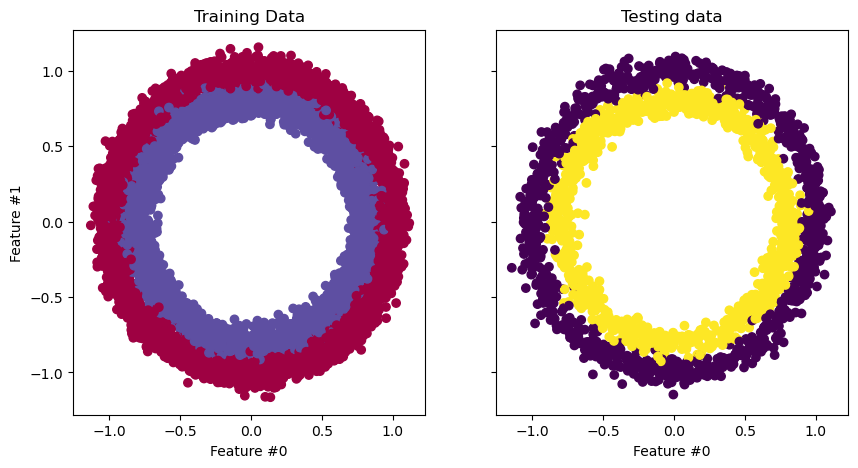

In [67]:
fig, axes = plt.subplots(
    ncols=2, sharex=True, sharey=True,figsize=(10,5)        # sharex, sharey  - it will help to keep the x and y same for all subplots
)
axes[0].scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
axes[0].set_title("Training Data")
axes[0].set_xlabel("Feature #0")
axes[0].set_ylabel("Feature #1")

axes[1].scatter(x_test[:, 0], x_test[:, 1], c=y_test,)
axes[1].set_xlabel("Feature #0")
axes[1].set_title("Testing data")
plt.show()

In [68]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((8000, 2), (8000,), (2000, 2), (2000,))

In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

lr.score(x_test, y_test)

0.506

In [70]:
from sklearn.naive_bayes import GaussianNB

GB = GaussianNB()

GB.fit(x_train, y_train)

GB.score(x_test, y_test)

0.975

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(x_train, y_train)

dt.score(x_test, y_test)

0.964

In [72]:
dt_logloss = DecisionTreeClassifier(criterion='log_loss')

dt_logloss.fit(x_train, y_train)

dt_logloss.score(x_test, y_test)

0.9625

# Log Loss (Logarithmic Loss)

Log Loss, also known as **cross-entropy loss**, is a metric used to evaluate the performance of a classification model, especially for probabilistic predictions. It measures the difference between predicted probabilities and actual class labels. The goal is to minimize log loss, with lower values indicating better model performance.

---

## **Mathematical Formula**

### **Binary Classification**
For a binary classification problem with two classes (0 and 1), the log loss for a single sample is:

![Binary Log Loss Formula](https://miro.medium.com/v2/resize:fit:1370/1*VsW0w9lTM3UW56OAbXXoHg.png)

Where:
- \( y \): The actual label (0 or 1).
- \( p \): The predicted probability of the class being 1.

---

### **Multi-Class Classification**
For multi-class classification with \( M \) classes, the log loss is:

![Multi-Class Log Loss Formula](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-03-11-43-42.png)

Where:
- \( N \): Number of samples.
- \( M \): Number of classes.
- \( y_{ij} \): 1 if sample \( i \) belongs to class \( j \), otherwise 0.
- \( p_{ij} \): Predicted probability that sample \( i \) belongs to class \( j \).

---

## **Example**

Suppose you have a binary classification problem with the following predictions and actual labels:

| Actual Label (\( y \)) | Predicted Probability (\( p \)) |
|------------------------|---------------------------------|
| 1                      | 0.9                             |
| 0                      | 0.2                             |
| 1                      | 0.6                             |

The log loss for each sample is calculated as:

# Average Log Loss Calculation

The log loss for a single example is defined as:

$$
\text{loss} = -\Big( y \ln(p) + (1 - y) \ln(1 - p) \Big)
$$

## Example Calculations

1. **For \( y = 1 \) and \( p = 0.9 \):**

   $$
   \text{loss}_1 = -\Big(1 \cdot \ln(0.9) + 0 \cdot \ln(0.1)\Big) = -\ln(0.9)
   $$
   
   Since \(\ln(0.9) \approx -0.10536\), we have:
   
   $$

   \text{loss}_1 \approx 0.10536
   $$


2. **For \( y = 0 \) and \( p = 0.2 \):**

   $$
   \text{loss}_2 = -\Big(0 \cdot \ln(0.2) + 1 \cdot \ln(0.8)\Big) = -\ln(0.8)
   $$
   
   Since \(\ln(0.8) \approx -0.22314\), we have:
   
   $$
   \text{loss}_2 \approx 0.22314
   $$


3. **For \( y = 1 \) and \( p = 0.6 \):**

   $$
   \text{loss}_3 = -\Big(1 \cdot \ln(0.6) + 0 \cdot \ln(0.4)\Big) = -\ln(0.6)
   $$

   
   Since \(\ln(0.6) \approx -0.51083\), we have:
   
   $$
   \text{loss}_3 \approx 0.51083
   $$
   
## Average Log Loss

The average log loss over these three examples is calculated as:

   $$
\text{Average Log Loss} = \frac{\text{loss}_1 + \text{loss}_2 + \text{loss}_3}{3} \approx \frac{0.10536 + 0.22314 + 0.51083}{3}
   $$

   $$
\text{Average Log Loss} \approx \frac{0.83933}{3} \approx 0.27978
   $$

Thus, the average log loss is approximately **0.28**.

---

## **When to Use Log Loss**

- Use `criterion='log_loss'` in `DecisionTreeClassifier` when:
  - You want the model to output probabilities.
  - You are working on a classification problem with imbalanced classes.
  - You want to penalize overconfident incorrect predictions.

---

## **Advantages & Disadvantages**

| **Advantages**                          | **Disadvantages**                     |
|-----------------------------------------|----------------------------------------|
| Works well with probabilistic outputs.  | Sensitive to outliers.                 |
| Penalizes overconfidence.               | Not intuitive for non-technical users. |
| Suitable for imbalanced data.           |                                        |

---

## **Conclusion**

Log loss is a powerful metric for evaluating classification models, especially when probabilistic predictions are required. By minimizing log loss, the model learns to make predictions that align closely with the true class labels.

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

RandomForestClassifier()

In [74]:
rf.score(x_test, y_test)

0.972

In [75]:
print('The score of Logistic regression - ',lr.score(x_test,y_test))
print('The score of Decision Tree(entropy) - ',dt.score(x_test,y_test))
print('The score of Decision Tree(log_loss) - ',dt_logloss.score(x_test,y_test))
print('The score of Naive Bayes - ',GB.score(x_test,y_test))
print('The score of Random Forest - ',rf.score(x_test,y_test))

The score of Logistic regression -  0.506
The score of Decision Tree(entropy) -  0.964
The score of Decision Tree(log_loss) -  0.9625
The score of Naive Bayes -  0.975
The score of Random Forest -  0.972


In [76]:
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Decision Tree(log_loss)': dt_logloss,
    'Random Forest': rf,
    'Naive Bayes': GB
}